# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fale old settlement
Processing Record 2 of Set 1 | pacific grove
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | ruidoso
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 12 of Set 1 | san jose village
City not found. Skipping...
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | nar'yan-mar
Processing Record 18 of Set 1 | hastings
Processing Record 19 of Set 1 | minas de marcona
Processing Record 20 of Set 1 | horizon city
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fale old settlement,-9.3852,-171.2468,27.93,74,28,3.45,TK,1730644858
1,pacific grove,36.6177,-121.9166,12.83,92,0,9.39,US,1730644859
2,margaret river,-33.9500,115.0667,12.10,79,2,2.83,AU,1730644860
3,port elizabeth,-33.9180,25.5701,22.16,82,20,5.66,ZA,1730644862
4,punta arenas,-53.1500,-70.9167,11.06,58,75,7.72,CL,1730644580
5,port-aux-francais,-49.3500,70.2167,5.34,83,20,9.68,TF,1730644864
6,tiksi,71.6872,128.8694,-23.13,100,100,1.84,RU,1730644865
7,bilibino,68.0546,166.4372,-24.21,96,93,3.26,RU,1730644866
8,ruidoso,33.3317,-105.6730,9.08,40,0,5.14,US,1730644800
9,iqaluit,63.7506,-68.5145,-6.15,85,75,3.09,CA,1730644868


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,27.93,74,28,3.45,TK,1730644858
1,pacific grove,36.6177,-121.9166,12.83,92,0,9.39,US,1730644859
2,margaret river,-33.9500,115.0667,12.10,79,2,2.83,AU,1730644860
3,port elizabeth,-33.9180,25.5701,22.16,82,20,5.66,ZA,1730644862
4,punta arenas,-53.1500,-70.9167,11.06,58,75,7.72,CL,1730644580


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

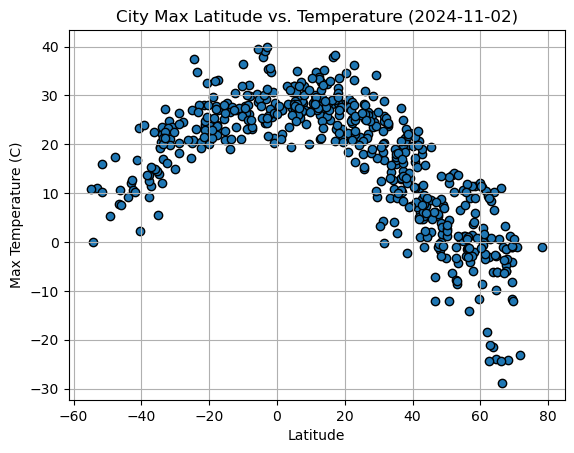

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolor='black')
plt.title("City Max Latitude vs. Temperature (2024-11-02)") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

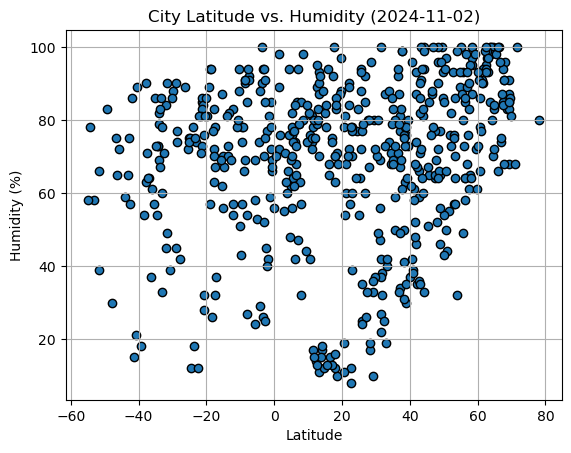

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolor='black')
plt.title("City Latitude vs. Humidity (2024-11-02)") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

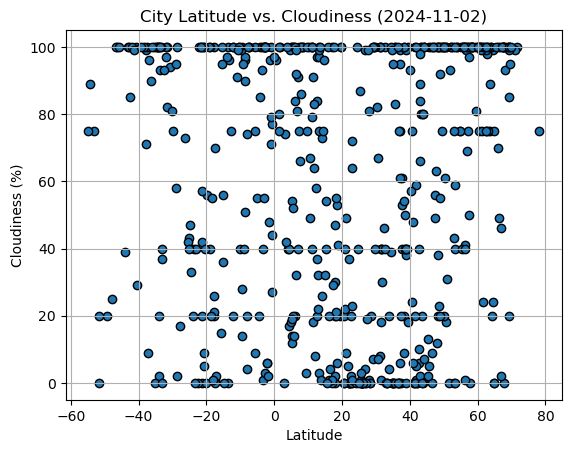

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolor='black')
plt.title("City Latitude vs. Cloudiness (2024-11-02)") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

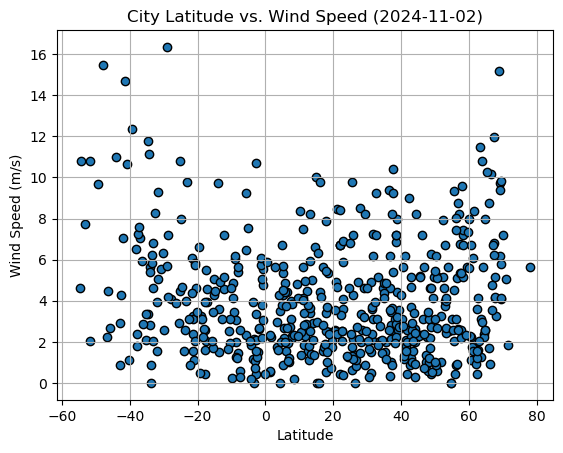

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolor='black')
plt.title("City Latitude vs. Wind Speed (2024-11-02)") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate the regression line values
    regress_values = slope * x_values + intercept

    # Create line equation string
    line_eq = "y_values = " + str(round(slope,2)) + "x_values +" + str(round(intercept,2))
    print(line_eq)
    
    # Create the scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    plt.title(f"{x_titles} vs. {y_titles}")

    # Print r^2 value
    print(f"The r^2-value is: {r_value**2}")

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pacific grove,36.6177,-121.9166,12.83,92,0,9.39,US,1730644859
6,tiksi,71.6872,128.8694,-23.13,100,100,1.84,RU,1730644865
7,bilibino,68.0546,166.4372,-24.21,96,93,3.26,RU,1730644866
8,ruidoso,33.3317,-105.6730,9.08,40,0,5.14,US,1730644800
9,iqaluit,63.7506,-68.5145,-6.15,85,75,3.09,CA,1730644868


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,27.93,74,28,3.45,TK,1730644858
2,margaret river,-33.9500,115.0667,12.10,79,2,2.83,AU,1730644860
3,port elizabeth,-33.9180,25.5701,22.16,82,20,5.66,ZA,1730644862
4,punta arenas,-53.1500,-70.9167,11.06,58,75,7.72,CL,1730644580
5,port-aux-francais,-49.3500,70.2167,5.34,83,20,9.68,TF,1730644864


###  Temperature vs. Latitude Linear Regression Plot

y_values = -0.6x_values +35.69
The r^2-value is: 0.7382666772018377


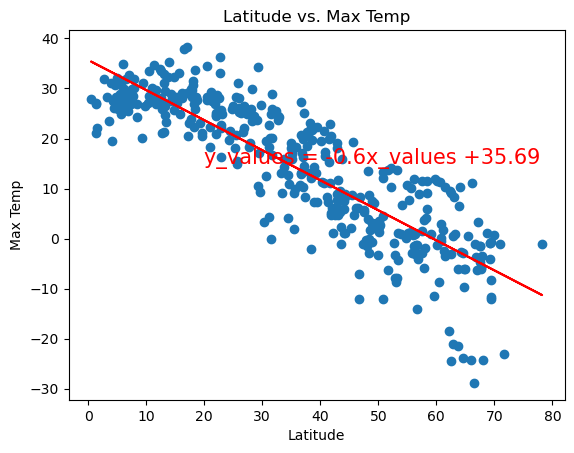

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temp")

y_values = 0.38x_values +31.16
The r^2-value is: 0.566161244634942


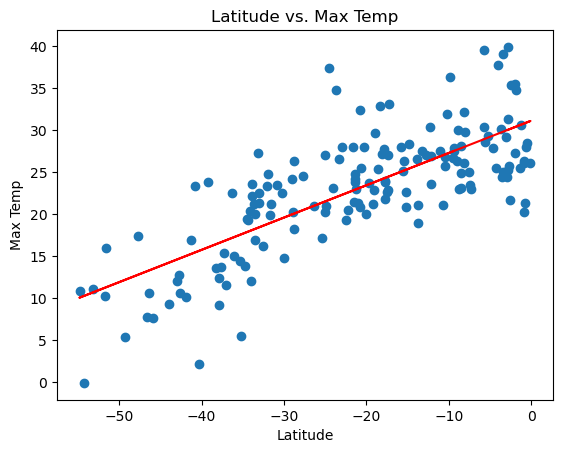

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression_plot(x_values, y_values, 'Latitude','Max Temp')

**Discussion about the linear relationship:** 

For the northern hemisphere's linear relationship, we see that when the latitude increases, the maximum temperature decreases. We see that in the linear equation that the slope is -0.6. That means that whenever the x and y values increases, the maximum temperature will decrease by 0.6. For the southern hemisphere's linear relationship, we see that when the latitude increases, the maximum temperature increases. We see that in the linear equation that the slope is 0.38. That means that whenever the x and y values increase, the maximum temperature will increase by 0.38.

The r^2-value for the northern hemisphere is: 0.7382666772018377 and the r^2-value for the southern hemisphere is: 0.566161244634942. This means that for the northern hemisphere, 73.8% of the variation in maximum temperature can be explained by the latitude. This indicates a stronger relationship between the maximum temperature and latitude for the northern hemisphere compared to the southern hemisphere. The southern hemisphere's r^2-value indicates that 56.6% of the variation in the maximum tempearture can be explained by the latitude. 

### Humidity vs. Latitude Linear Regression Plot

y_values = 0.34x_values +57.82
The r^2-value is: 0.08666126447319747


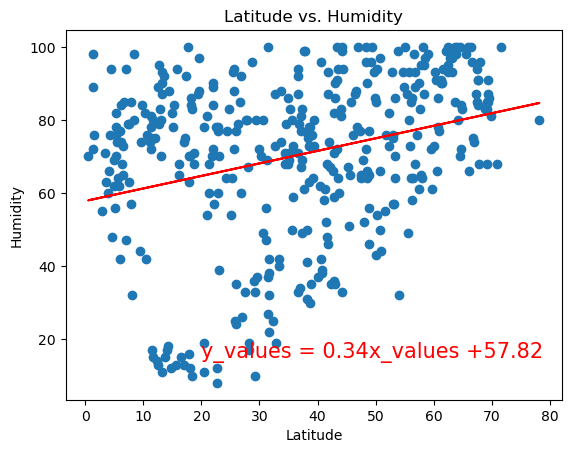

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity')

y_values = 0.16x_values +70.47
The r^2-value is: 0.011909384801287254


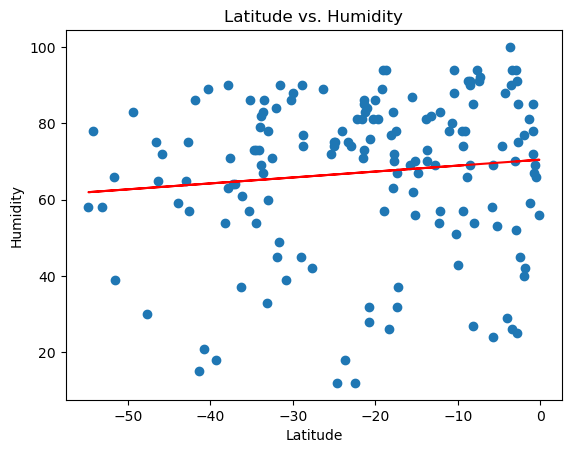

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression_plot(x_values, y_values, 'Latitude','Humidity')

**Discussion about the linear relationship:** 

For the northern hemisphere's linear relationship, we see that when the latitude increases, the humidity increases. We see that in the linear equation that the slope is 0.34. That means that whenever the x and y values increases, the humidity will increase by 0.34. For the southern hemisphere's linear relationship, we also see that when the latitude increases, the humidity increases. We see that in the linear equation that the slope is 0.16. That means that whenever the x and y values increase, the humidity will increase by 0.16.

The r^2-value for the northern hemisphere is: 0.08666126447319747 and the r^2-value for the southern hemisphere is: 0.011909384801287254. This means that for both hemispheres, there is a weak relationship between the latitude and humidity. For the northern hemisphere, 8.7% of the variation in the humdity can be explained by the latitude. This indicates a slightly stronger relationship between the humidity and latitude for the northern hemisphere compared to the southern hemisphere. For the southern hemisphere, 1.2% of the variation in the humidity can be explained by the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

y_values = 0.47x_values +39.63
The r^2-value is: 0.053026289715156334


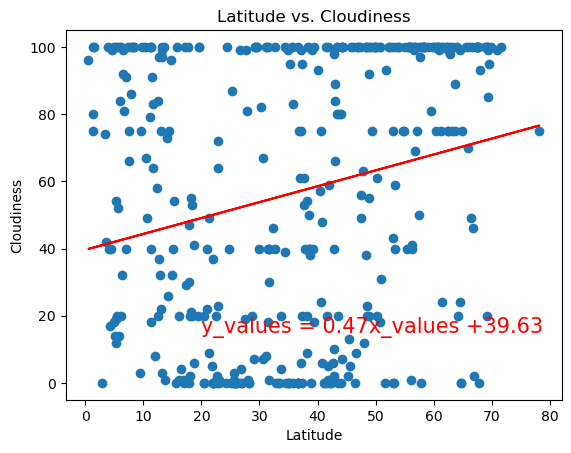

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness')

y_values = -0.16x_values +59.74
The r^2-value is: 0.003505989037143251


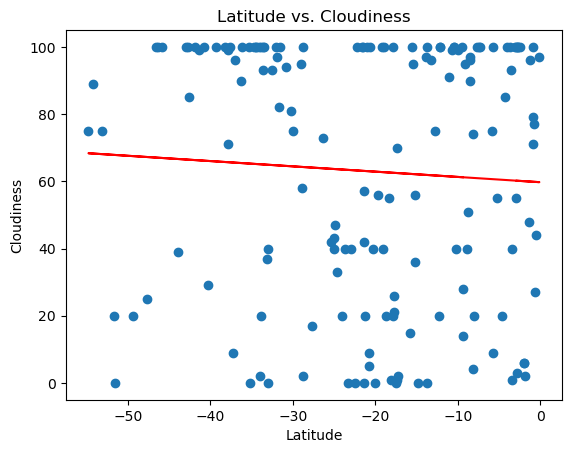

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression_plot(x_values, y_values, 'Latitude','Cloudiness')

**Discussion about the linear relationship:** 

For the northern hemisphere's linear relationship, we see that when the latitude increases, the cloudiness increases. We see that in the linear equation that the slope is 0.47. That means that whenever the x and y values increases, the cloudiness will increase by 0.47. For the southern hemisphere's linear relationship, we see that when the latitude increases, the cloudiness decreases. We see that in the linear equation that the slope is -0.16. That means that whenever the x and y values increase, the cloudiness will decrease by 0.16.

The r^2-value for the northern hemispheris: 0.05302628971515633447 and the r^2-value for the southern hemispheris: 0.00350598903714325154. This means that for both hemispheres, there is a weak relationship between the latitude ancloudinessty. For the northern hemisphere5.3.7% of the variation in thcloudinessty can be explained by the latitudeLike the humidity and latitude relationship, the r^2-valuesis indicates a slightly stronger relationship between thcloudinessty and latitude for the northern hemisphere compared to the southern hemisphere. For the southern hemisphere0.4.2% of the variation in the humidity can be explained by the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

y_values = 0.03x_values +2.8
The r^2-value is: 0.03955849838925388


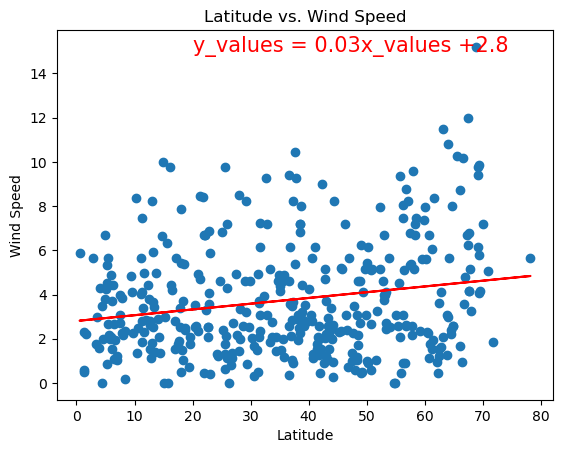

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed')

y_values = -0.08x_values +2.59
The r^2-value is: 0.1470111078375406


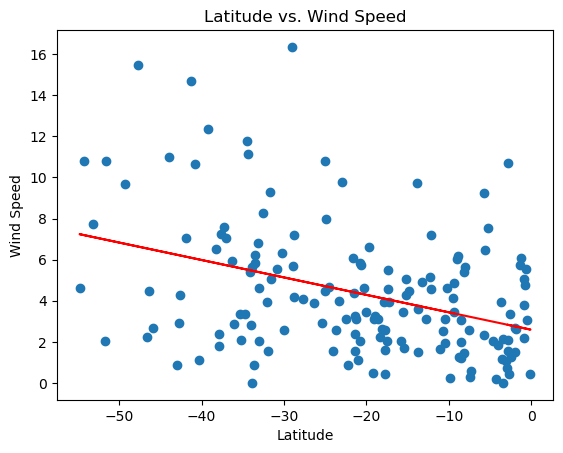

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression_plot(x_values, y_values, 'Latitude','Wind Speed')

**Discussion about the linear relationship:** 

For the northern hemisphere's linear relationship, we see that when the latitude increases, the wind speed increases. We see that in the linear equation that the slope is 0.03. That means that whenever the x and y values increases, the wind speed will increase by 0.03. For the southern hemisphere's linear relationship, we see that when the latitude increases, the wind speed decreases. We see that in the linear equation that the slope is -0.08. That means that whenever the x and y values increase, the maximum temperature will decrease by 0.08.

The r^2-value for the northern hemisphere is: 0.03955849838925388 and the r^2-value for the southern hemisphere is: 0.1470111078375406. This means that for both hemispheres, there is a weak relationship between the latitude and cloudiness. For the northern hemisphere, 3.96% of the variation in the cloudiness can be explained by the latitude. Different from the humidity and latitude relationship and the cloudiness and latitude relationship, the r^2-values indicates a slightly stronger relationship between the wind speed and latitude for the southern hemisphere compared to the northern hemisphere. For the southern hemisphere, 1.47% of the variation in the wind speed can be explained by the latitude.